<a href="https://colab.research.google.com/github/sigvehaug/Introduction-to-Python-for-Medical-Researchers/blob/master/Exercise_4_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Python Programming for Medical Researchers, University of Bern, Sigve Haug

# Exercise 4

## 4.1 Blood Pressure Revised

Using the dataset with the blood pressure measurements, plot the mean blood pressure per age decade for both women and men. 


In [17]:
# Load the data
import pandas as pd
url = 'https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/bloodpressuredata.csv'
df = pd.read_csv(url)
#df

,Age,Sex,BP_SYS,BP_DIA
0,87.76,0,#NULL!,60
1,76.22,0,150,77
2,70.28,0,115,72
3,100.28,1,183,82
4,61.62,0,#NULL!,#NULL!
...,...,...,...,...
95,93.16,1,#NULL!,#NULL!
96,62.69,0,133,72
97,79.45,1,200,70
98,86.94,1,149,54


In [22]:
# Clean the data
dfc = df[df['BP_SYS']!='#NULL!']
dfc = dfc.astype('float')
dfc

,Age,Sex,BP_SYS,BP_DIA
1,76.22,0.0,150.0,77.0
2,70.28,0.0,115.0,72.0
3,100.28,1.0,183.0,82.0
5,82.79,1.0,140.0,90.0
6,91.38,1.0,135.0,60.0
...,...,...,...,...
94,100.81,1.0,212.0,114.0
96,62.69,0.0,133.0,72.0
97,79.45,1.0,200.0,70.0
98,86.94,1.0,149.0,54.0


In [56]:
# Make age decades
decs  = [10,20,30,40,50,60,70,80,80,100,110]
#decs  = [110]
decs
histo_F = []
histo_M = []
for dec in decs:
  dfcd_F = dfc[(dfc['Sex']==0) & (dfc['Age'] < float(dec)) & (dfc['Age'] >= (float(dec)-110.))]
  dfcd_M = dfc[(dfc['Sex']==1) & (dfc['Age'] < float(dec)) & (dfc['Age'] >= (float(dec)-110.))]
  mbp_F = dfcd_F['BP_SYS'].mean()
  mbp_M = dfcd_M['BP_SYS'].mean()
  print('Female ¦ Male   %8.2f ¦ %8.2f' % (mbp_F,mbp_M))
  histo_F.append(mbp_F)
  histo_M.append(mbp_M)


Female ¦ Male        nan ¦      nan
Female ¦ Male        nan ¦      nan
Female ¦ Male        nan ¦   126.00
Female ¦ Male     123.00 ¦   126.00
Female ¦ Male     142.80 ¦   132.80
Female ¦ Male     139.12 ¦   141.57
Female ¦ Male     140.91 ¦   138.50
Female ¦ Male     139.32 ¦   149.91
Female ¦ Male     139.32 ¦   149.91
Female ¦ Male     138.57 ¦   149.91
Female ¦ Male     138.57 ¦   152.56


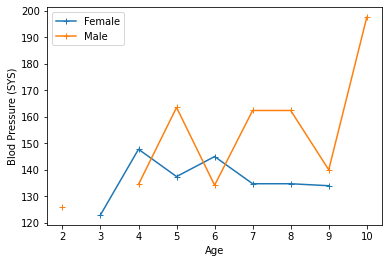

In [54]:
import matplotlib.pyplot as plt
plt.plot(histo_F,marker='+',label='Female')
plt.plot(histo_M,marker='+',label='Male')
plt.xlabel('Age')
plt.ylabel('Blod Pressure (SYS)')
plt.legend()
plt.show()

## 4.2 Run and Study this Code Example

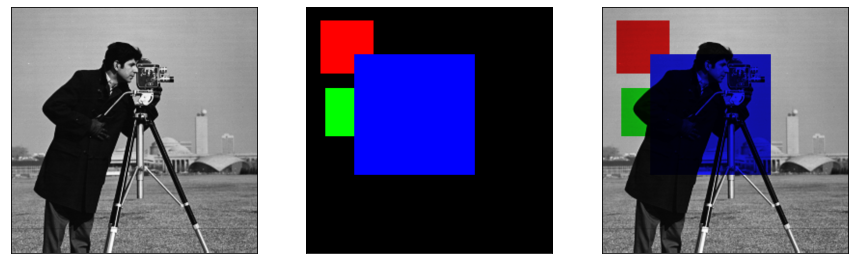

In [60]:
from skimage import data, color, io, img_as_float
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.9

img = img_as_float(data.camera())
rows, cols = img.shape

# Construct a colour image to superimpose
color_mask = np.zeros((rows, cols, 3))
color_mask[30:140, 30:140] = [1, 0, 0]  # Red block
color_mask[170:270, 40:120] = [0, 1, 0] # Green block
color_mask[100:350, 100:350] = [0, 0, 1] # Blue block

# Construct RGB version of grey-level image
img_color = np.dstack((img, img, img))

# Convert the input image and color mask to Hue Saturation Value (HSV)
# colorspace
img_hsv = color.rgb2hsv(img_color)
color_mask_hsv = color.rgb2hsv(color_mask)

# Replace the hue and saturation of the original image
# with that of the color mask
img_hsv[..., 0] = color_mask_hsv[..., 0]
img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

img_masked = color.hsv2rgb(img_hsv)

# Display the output
f, (ax0, ax1, ax2) = plt.subplots(1, 3,
                                  subplot_kw={'xticks': [], 'yticks': []},figsize=(15,15))
ax0.imshow(img, cmap=plt.cm.gray)
ax1.imshow(color_mask)
ax2.imshow(img_masked)
plt.show( )